In [1]:
import pandas as pd
import numpy as np

In [30]:
# !conda install scikit-learn --y
cols = []
cols.append('fn')
cols.append('event')
cols.append('tE')
cols.append('t0')
cols.append('u0')
for i in range(49):
    cols.append(i)

In [74]:
dfml = pd.read_csv("trainingset/microlensing.csv", names=cols)
dfmlnot = pd.read_csv("trainingset/not_microlensing.csv", names=cols)

dfml["target"] = 1
dfmlnot["target"] = 0

df = pd.concat([dfml, dfmlnot], axis=0)
df = df.sample(frac = 1).reset_index()

df.index

RangeIndex(start=0, stop=22400, step=1)

In [81]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN
df.dropna(inplace=True)

# df.dropna().iloc[np.where(df.dropna()==np.inf)]

df = df.reset_index()
df = df.drop(["index", "level_0"], axis=1)
display(df)

,fn,event,tE,t0,u0,0,1,2,3,4,...,40,41,42,43,44,45,46,47,48,target
0,../Crowdsourcecopy/crowdsource/crowdsource/csd...,low_noise_not_mlevent,0,0,0.00,336.016278,587.136097,0.363798,358.191406,360.453378,...,232.492947,365.538646,385.097165,1192.781477,0.399815,381.004726,731.903582,950.157000,818.008490,0
1,../Crowdsourcecopy/crowdsource/crowdsource/csd...,mlevent,533,-85,0.11,1028.496325,0.000000,0.000000,0.000000,0.000000,...,0.007105,0.000000,0.433563,0.000000,0.000000,0.018300,0.000000,0.009276,0.009024,1
2,../Crowdsourcecopy/crowdsource/crowdsource/csd...,noise_mlevent_orig,0,0,0.00,2297.522465,1980.264257,2060.957348,3369.822279,716.821530,...,0.051107,0.057092,0.028746,0.013112,0.017158,0.045695,0.008618,0.015012,0.032352,1
3,../Crowdsourcecopy/crowdsource/crowdsource/csd...,noise_not_mlevent,0,0,0.00,494.616315,123.265402,0.000000,85.720109,232.079973,...,29.024630,43.370729,334.928510,536.743704,0.000000,85.720299,577.764381,126.645383,159.451816,0
4,../Crowdsourcecopy/crowdsource/crowdsource/csd...,mlevent,421,-241,0.32,0.013522,0.002348,0.000000,0.000000,0.000000,...,0.013910,178.085351,991.254167,386.789333,2164.650896,0.000000,0.000000,0.016407,202.599582,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22311,../Crowdsourcecopy/crowdsource/crowdsource/csd...,noise_not_mlevent,0,0,0.00,0.117467,0.087201,32.601046,0.088237,43.229931,...,0.060660,0.057119,270.362547,0.030754,32.579777,0.025659,134.613225,0.021245,0.172011,0
22312,../Crowdsourcecopy/crowdsource/crowdsource/csd...,mlevent,496,134,0.42,0.002404,0.000000,0.005025,0.000000,0.008719,...,0.002258,0.000000,0.017365,0.016930,0.036035,0.000000,538.642688,0.023244,0.099388,1
22313,../Crowdsourcecopy/crowdsource/crowdsource/csd...,noise_mlevent_orig,0,0,0.00,267.976977,268.833624,162.170571,112.069461,0.408803,...,0.032708,0.004659,0.000000,0.004685,0.004685,0.002348,0.004696,0.007022,0.002337,1
22314,../Crowdsourcecopy/crowdsource/crowdsource/csd...,noise_mlevent_orig,0,0,0.00,7495.349130,2158.254836,0.000000,0.000000,945.055870,...,0.000000,0.000000,0.004892,0.004892,0.000000,0.000000,0.002446,0.000000,0.002284,1


In [82]:
x = df.drop(['target', 'fn', 'tE', 't0', 'u0', 'event'],axis='columns')
y = df["target"]

In [93]:
max(df.index)

22315

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [96]:
max(X_test.index)

22312

In [85]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [86]:
model.score(X_test,y_test)

0.7359695306373922

In [87]:
model = RandomForestClassifier(n_estimators=60, bootstrap=True)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7300324857174862

In [88]:
y_predicted = model.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[2742, 1104],
       [1306, 3775]])

In [98]:
copy = X_test.copy()
copy["y_test"] = y_test
copy["y_predicted"] = y_predicted
copy["event"] = np.array(df.iloc[copy.index]["event"])
copy["t0"] = np.array(df.iloc[copy.index]["t0"])
copy["u0"] = np.array(df.iloc[copy.index]["u0"])
copy["tE"] = np.array(df.iloc[copy.index]["tE"])

In [99]:
copy.index, df.index

(Index([ 9404, 21801,  2451,  4326, 16673,  9567,   282, 15236,    11, 16549,
        ...
        20542, 14653,  4264, 18537, 16318,  7355,   423, 21004, 17071, 14334],
       dtype='int64', length=8927),
 RangeIndex(start=0, stop=22316, step=1))

In [100]:
np.unique(df["event"])

array(['low_noise_mlevent_new', 'low_noise_not_mlevent', 'mlevent',
       'noise_mlevent_new', 'noise_mlevent_orig', 'noise_not_mlevent',
       'not_mlevent'], dtype=object)

Text(58.222222222222214, 0.5, 'Truth')

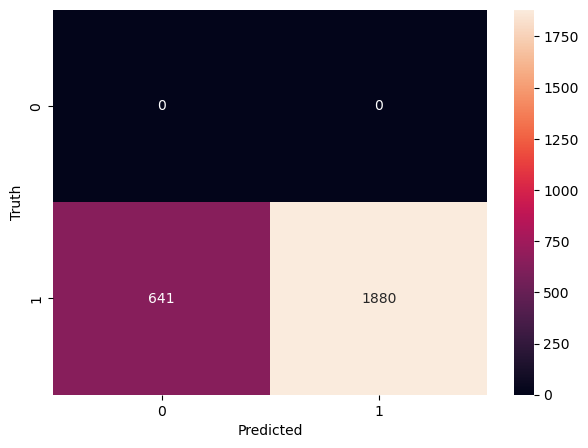

In [108]:
noise_mlevent_orig = copy.iloc[np.where("noise_mlevent_new"==copy["event"])]
mynext = copy.iloc[np.where("noise_mlevent_orig"==copy["event"])]

cm = confusion_matrix(noise_mlevent_orig["y_test"], noise_mlevent_orig["y_predicted"])
cm2 = confusion_matrix(mynext["y_test"], mynext["y_predicted"])
cm = cm + cm2

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(58.222222222222214, 0.5, 'Truth')

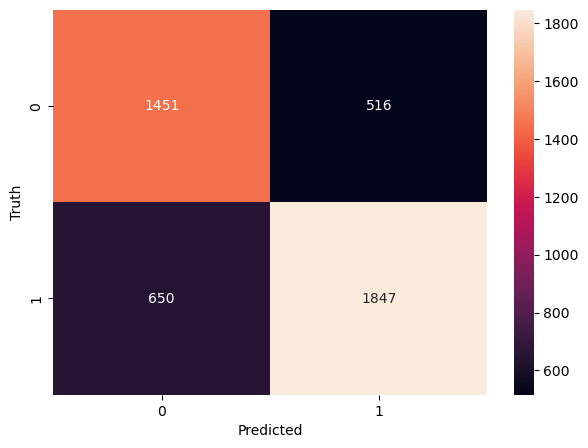

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Truth')